# 문제
1. corona.csv 파일 로드
2. Unnamed:0 컬럼을 삭제
3. 컬럼을 첫 번째부터 세번째까지 컬럼만 두고 전부 삭제
4. 컬럼의 이름 변경['등록일시','누적사망자','누적확진자']
5. 등록일시를 기준으로 오름차순 정렬
6. 일일확진자와 일일사망자 파생변수 생성(결측치는 0으로 대체)
7. 일일 확진자가 음수인 값을 삭제
7. 등록일시를 시계열로 변경하고 인덱스로 변경
8. 요일이라는 파생변수를 만들어서 요일 대입
9. 요일 컬럼 0 ->월 1->화 ,.... 6까지 만들기
10. 요일별 일일 확진자의 평균을 바 그래프로 표시
11. 요일별 일일 사망자의 평균을 바 그래프로 표시

In [16]:
import platform
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


In [17]:
corona=pd.read_csv("../csv/corona.csv",usecols=[1,2,3])
corona.columns=['등록일시','누적사망자','누적확진자']
corona.sort_values('등록일시',inplace=True)

corona

,등록일시,누적사망자,누적확진자
819,2020-03-10 00:00:00.000,54,7513
818,2020-03-11 00:00:00.000,60,7755
817,2020-03-12 00:00:00.000,66,7869
816,2020-03-13 00:00:00.000,67,7979
815,2020-03-14 00:00:00.000,72,8086
...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814
3,2022-06-05 08:53:19.426,24258,18163648
2,2022-06-06 09:00:06.734,24279,18168670
1,2022-06-07 09:09:00.897,24299,18174842


In [18]:
corona['일일사망자']=corona['누적사망자']- corona['누적사망자'].shift(1)

In [19]:
corona['일일확진자']=corona['누적확진자']- corona['누적확진자'].shift(1)

In [20]:
corona.fillna(0,inplace=True)
corona

,등록일시,누적사망자,누적확진자,일일사망자,일일확진자
819,2020-03-10 00:00:00.000,54,7513,0.0,0.0
818,2020-03-11 00:00:00.000,60,7755,6.0,242.0
817,2020-03-12 00:00:00.000,66,7869,6.0,114.0
816,2020-03-13 00:00:00.000,67,7979,1.0,110.0
815,2020-03-14 00:00:00.000,72,8086,5.0,107.0
...,...,...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814,9.0,12039.0
3,2022-06-05 08:53:19.426,24258,18163648,20.0,9834.0
2,2022-06-06 09:00:06.734,24279,18168670,21.0,5022.0
1,2022-06-07 09:09:00.897,24299,18174842,20.0,6172.0


In [21]:
corona=corona.loc[~(corona['일일확진자']<0)]
corona.set_index("등록일시",inplace=True)


In [22]:
corona.index=pd.to_datetime(corona.index)
corona

,누적사망자,누적확진자,일일사망자,일일확진자
등록일시,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0
2020-03-11 00:00:00.000,60,7755,6.0,242.0
2020-03-12 00:00:00.000,66,7869,6.0,114.0
2020-03-13 00:00:00.000,67,7979,1.0,110.0
2020-03-14 00:00:00.000,72,8086,5.0,107.0
...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,9.0,12039.0
2022-06-05 08:53:19.426,24258,18163648,20.0,9834.0
2022-06-06 09:00:06.734,24279,18168670,21.0,5022.0


In [23]:
for i in corona.index:
    #print(i)
    corona.loc[i,'날짜']=i.weekday()
#corona['날짜'].value_counts()
corona

C:\Users\dgh06\AppData\Local\Temp\ipykernel_34024\1335224018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona.loc[i,'날짜']=i.weekday()


,누적사망자,누적확진자,일일사망자,일일확진자,날짜
등록일시,,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0,1.0
2020-03-11 00:00:00.000,60,7755,6.0,242.0,2.0
2020-03-12 00:00:00.000,66,7869,6.0,114.0,3.0
2020-03-13 00:00:00.000,67,7979,1.0,110.0,4.0
2020-03-14 00:00:00.000,72,8086,5.0,107.0,5.0
...,...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,9.0,12039.0,5.0
2022-06-05 08:53:19.426,24258,18163648,20.0,9834.0,6.0
2022-06-06 09:00:06.734,24279,18168670,21.0,5022.0,0.0


In [24]:
# 방법 1
#for i in corona.index:
#    if corona.loc[i,'날짜']==0:
#        corona.loc[i,'날짜']='월'
#    elif corona.loc[i,'날짜']==1:
#        corona.loc[i,'날짜']='화'
#    elif corona.loc[i,'날짜']==2:
#        corona.loc[i,'날짜']='수'
#    elif corona.loc[i,'날짜']==3:
#        corona.loc[i,'날짜']='목'
#    elif corona.loc[i,'날짜']==4:
#       corona.loc[i,'날짜']='금'
#    elif corona.loc[i,'날짜']==5:
#        corona.loc[i,'날짜']='토'
#    elif corona.loc[i,'날짜']==6:
#        corona.loc[i,'날짜']='일'



In [25]:
# 방법 2
#_list=corona['날짜'].astype(int).unique()
#week_name =['월','화','수','목','금','토','일']

#for i in _list:
#    corona.loc[corona['날짜']==i,'날짜']= week_name[i]

In [26]:
# 방법 3
week={
    0:'월',
    1:"화",
    2:'수',
    3:'목',
    4:'금',
    5:'토',
    6:'일'
}
corona['날짜']=corona['날짜'].replace(week)


C:\Users\dgh06\AppData\Local\Temp\ipykernel_34024\4293150977.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['날짜']=corona['날짜'].replace(week)


In [27]:
corona['날짜'].value_counts()

화    118
수    118
금    117
토    117
일    117
목    116
월    116
Name: 날짜, dtype: int64

<Axes: xlabel='날짜'>

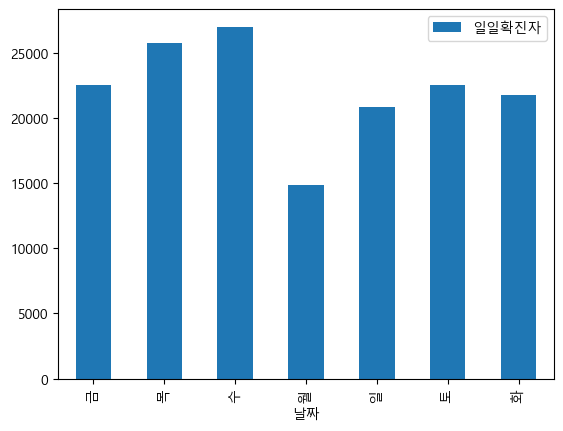

In [28]:
corona[['날짜','일일확진자']].groupby('날짜').mean().plot.bar()

<Axes: xlabel='날짜'>

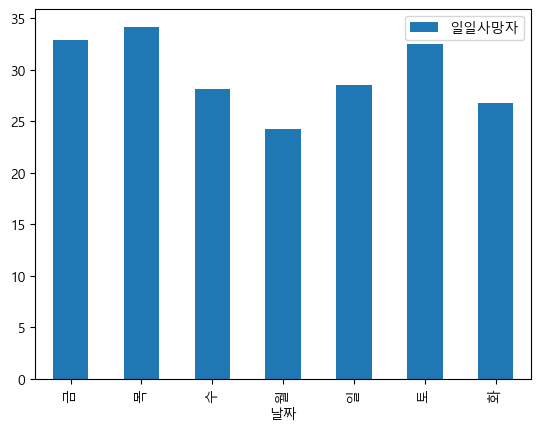

In [29]:
corona[['날짜','일일사망자']].groupby('날짜').mean().plot.bar()